# Predicting heart disease using machine learning
THis notebook looks into using various python-based machine learning and data science libraries in an attempt to build machine learning model capable of predicting whether or not someone has a heart disease base on their medical attributes.

We're gonna take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statement ,
>Given clinical parameters about a patient , can we predict whether or not they have heart disease?

## 2.Data

The original data came from the Cleaveland data from  the UCI Machine Learning Repository .https://archive.ics.uci.edu/dataset/45/heart+disease
There is also a version of it available on kaggle .https://www.kaggle.com/c/heart-disease-uci/data

## 3.Evaluation

>If we can reach 95% accuracy at predicting whether or not a patient has a heart disease ?

## 4.Features

This is where you'll get different information about each of the features in your data .

**Create data dictionary**
* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

## Preparing the tools 
We're gonna use pandas , matplotlib and numpy for data analysis and manipulation

In [1]:
#Import all the tools we need 

#Regular EDA (exploratory data analysis ) amd plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Models Evaluations
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import  precision_score,recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
## Load data
df = pd.read_csv("heart-disease.csv")
df
df.shape
df.size

4242

## Data exploration (explaratory data analysis or EDA)

The goal here is to find more about the data and become subject matter export on the dataset you're  working with. (avoid overfitting as well as underfitting)

1. What questions are you trying to solve?
2. What kind of data we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add , change or remove features to get more out of your data?

In [3]:
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

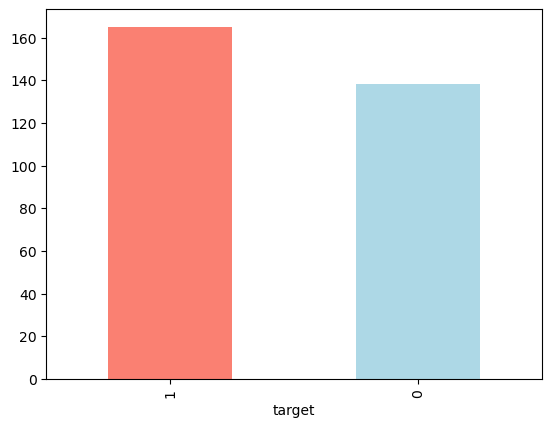

In [5]:
plt.close('all')
df["target"].value_counts().plot(kind = "bar" , color =["salmon","lightblue"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency according to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target ,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


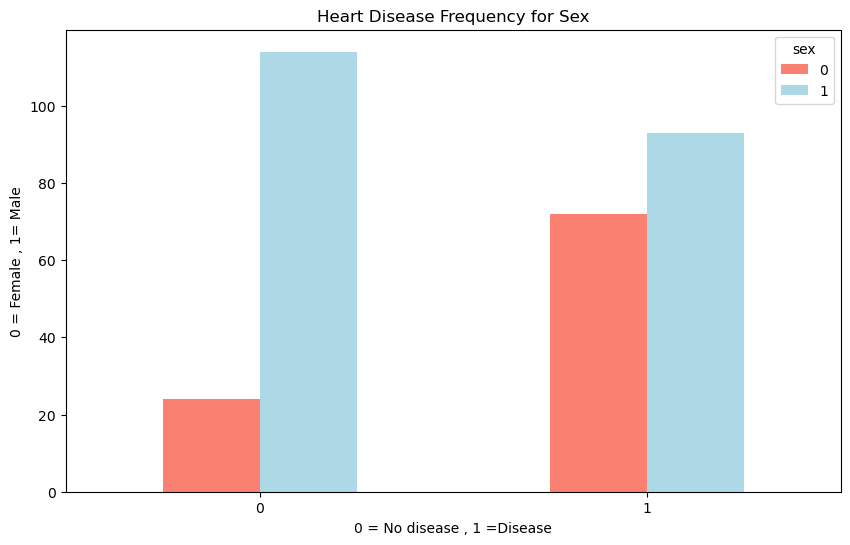

In [11]:
#create a plot of crosstab
plt.close('all')
pd.crosstab(df.target , df.sex).plot(kind = "bar" , figsize = (10,6) , color =["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease , 1 =Disease")
plt.ylabel("0 = Female , 1= Male")
plt.xticks(rotation = 0)
plt.show()

### Age vs Max heart Rate for heart disease



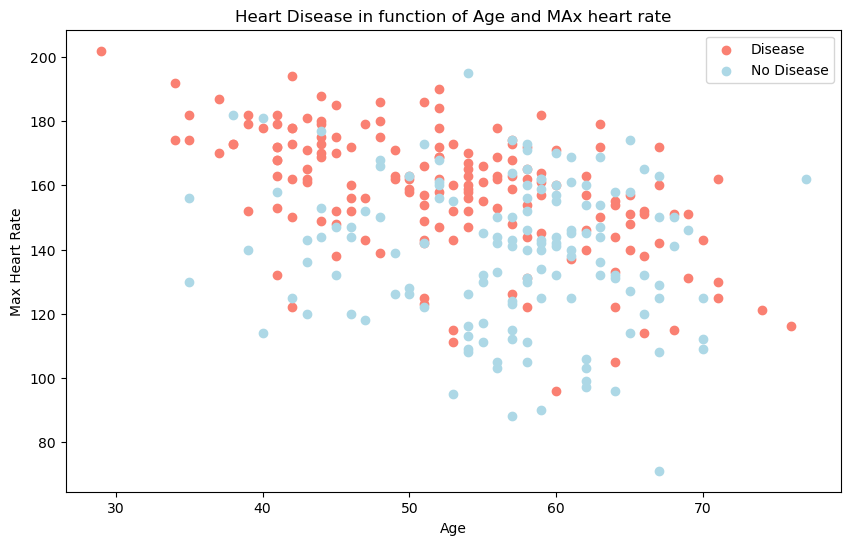

In [12]:
plt.close('all')
## Thalach for(max heart rate)
# Create another figure
plt.figure(figsize = (10 ,6))
#Scatter with positive examples 
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , c ="salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] , c ="lightblue")
# Add some infos
plt.title("Heart Disease in function of Age and MAx heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease" , "No Disease"])
plt.show()

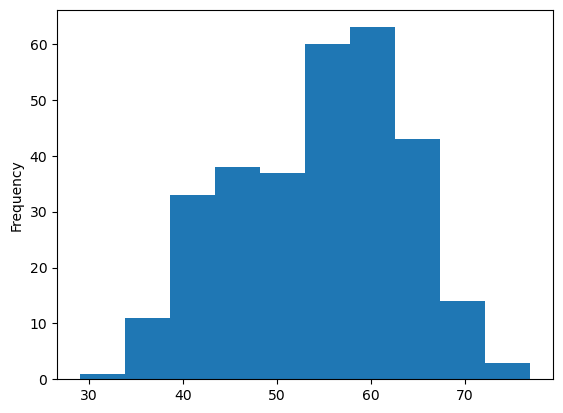

In [13]:
# Check the distribution of the age column with a histogram
plt.close('all')
df.age.plot.hist()
plt.show()

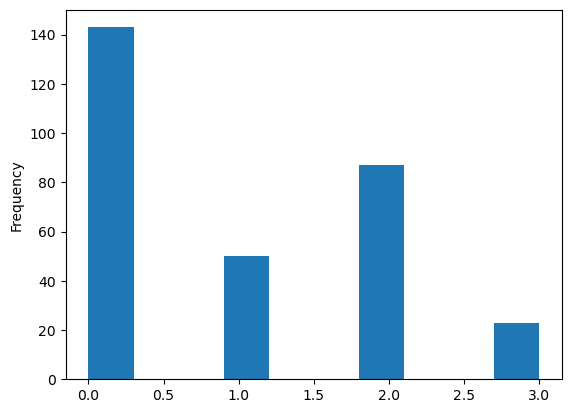

In [14]:
plt.close('all')
df.cp.plot.hist()
plt.show()

In [15]:
pd.crosstab(df.cp,df.target)#cp. Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


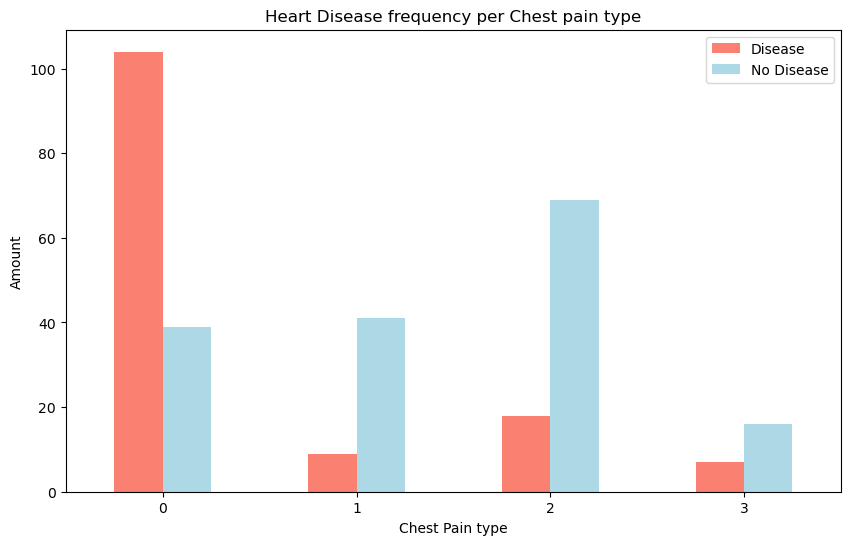

In [16]:
#Make the crosstab more visual 
plt.close('all')
pd.crosstab(df.cp , df.target) . plot(kind = "bar",figsize = (10,6) , color =["salmon" , "lightblue"])
# Add some infos
plt.title("Heart Disease frequency per Chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["Disease" , "No Disease"])
plt.xticks(rotation = 0)
plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


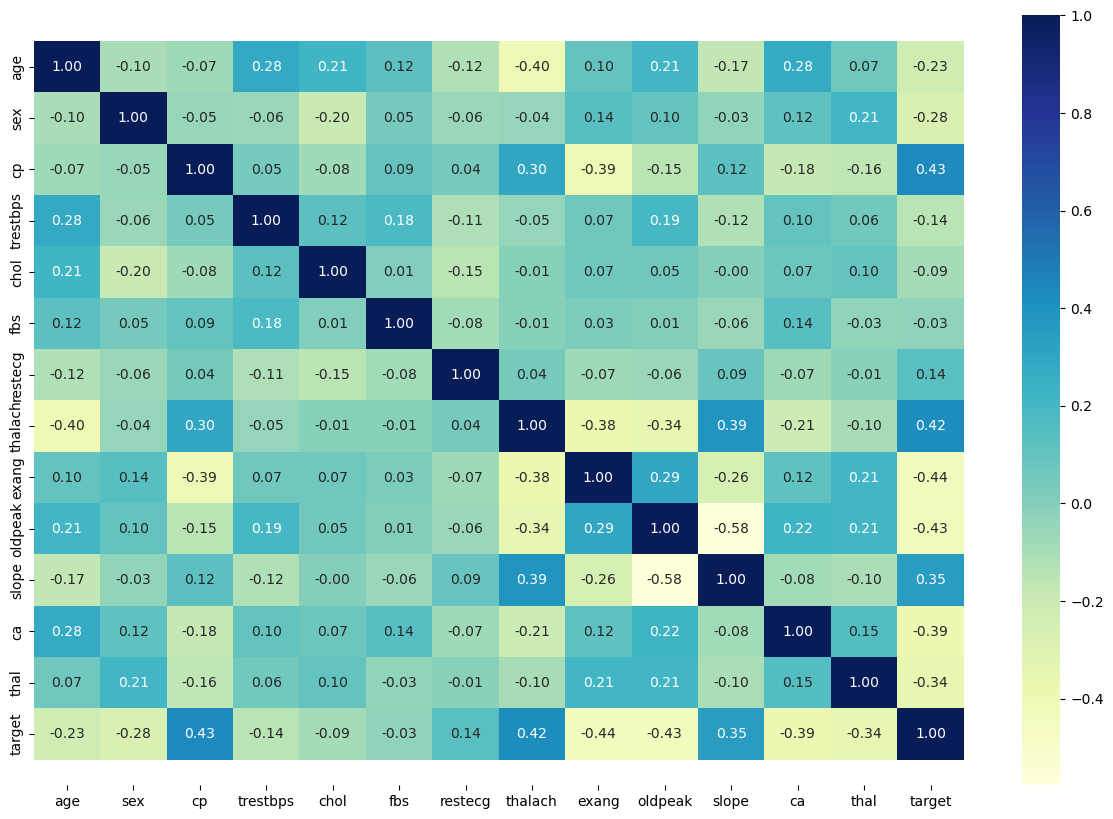

In [19]:
#Let's make our correlation matrix a little prettier
plt.close('all')
corr_matrix = df.corr()
fig , ax =plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix , annot = True , linewidths=0 , fmt =".2f" , cmap ="YlGnBu");
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
plt.show()

In [20]:
# Negative correlation (one variable goes up when other goes down)
# Positive correlation (both goes up or both goes down)
pd.crosstab(df.exang , df.target)

target,0,1
exang,,
0,62,142
1,76,23


# 5. Modelling

In [21]:
#split data into x & y
x= df.drop("target" , axis =1)
y= df["target"]
np .random. seed()
x_train ,x_test , y_train , y_test = train_test_split(x, y ,test_size=0.2)

In [22]:
x_train[:5] , y_train[:5] , x_test[:5] , y_test[:5]

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 220   63    0   0       150   407    0        0      154      0      4.0   
 141   43    1   0       115   303    0        1      181      0      1.2   
 125   34    0   1       118   210    0        1      192      0      0.7   
 200   44    1   0       110   197    0        0      177      0      0.0   
 232   55    1   0       160   289    0        0      145      1      0.8   
 
      slope  ca  thal  
 220      1   3     3  
 141      1   0     2  
 125      2   0     2  
 200      2   1     2  
 232      1   1     3  ,
 220    0
 141    1
 125    1
 200    0
 232    0
 Name: target, dtype: int64,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 228   59    1   3       170   288    0        0      159      0      0.2   
 259   38    1   3       120   231    0        1      182      1      3.8   
 215   43    0   0       132   341    1        0      136      1      3.0   
 282

We'll train it (find the pattern)

We'll test it (predict using the pattern)

We're gonna try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [23]:
# Put the models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
def fit_and_score(models , x_train , x_test , y_train,y_test):
    """
    Fits and eevaluates given machine learning models .
    models  : a dict of different Scikit-Learn machine learning models
    x_train : training data(no labels)
    x_test  : testing data(no labels)
    y_train : training labels 
    y_test  : testing labels
    """
    #set random seeed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name , model in models.items():
        #Fit the model to data
        model.fit(x_train , y_train)
        #Evaluate the model 
        model_scores[name] = model.score(x_test , y_test)

    return model_scores


In [24]:
model_scores = fit_and_score(models=models , x_train=x_train , x_test=x_test , y_train=y_train,y_test=y_test)
model_scores

C:\Users\SinhaWiz\Desktop\MLprojects\heart-Disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8852459016393442}

**Model Comparison**

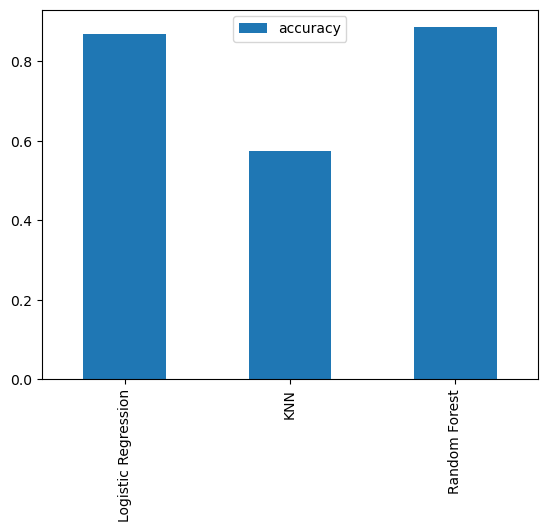

In [25]:
plt.close('all')
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar()
plt.show()

Now  we've got a baseline model  and we know a models first predictions aren't always what we should based our next  steps off .
What should we do?

Let's look at the following:
* Hyper parameter tuning
* Feature importance 
* Confusion Matrix
* Cross-Validation
* Precision
* F1 score
* Recall
* Classification Report 
* ROC Curve
* Area Under Curve (AUC)
### Hyper Parameter Tuning(BY HAND)

In [26]:
#Let's tune KNN
train_scores =[]
test_scores  =[]
# Create a list of different values for n_neighbors
neighbors = range(1,21)
#Setup KNN instance
knn = KNeighborsClassifier()
#Loop through different n_neighbors
for i in neighbors :
    knn.set_params(n_neighbors = i)
    #Fit the model
    knn.fit(x_train,y_train)
    #Update the training scores list 
    train_scores.append(knn.score(x_train,y_train))
     #Update the testing scores list 
    test_scores.append(knn.score(x_test,y_test))

In [27]:
train_scores


[1.0,
 0.7975206611570248,
 0.7603305785123967,
 0.7479338842975206,
 0.7479338842975206,
 0.7727272727272727,
 0.756198347107438,
 0.7272727272727273,
 0.7231404958677686,
 0.7024793388429752,
 0.6983471074380165,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6694214876033058,
 0.6900826446280992,
 0.6900826446280992,
 0.6900826446280992,
 0.6776859504132231,
 0.6735537190082644]

In [28]:
test_scores

[0.5409836065573771,
 0.5737704918032787,
 0.5573770491803278,
 0.6557377049180327,
 0.5737704918032787,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836]

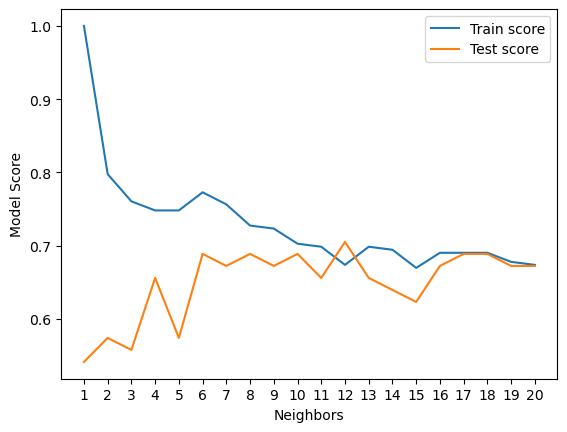

Maximum KNN score on the test data :70.49%


In [29]:
plt.close('all')
plt.plot(neighbors , train_scores,label="Train score")
plt.plot(neighbors , test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data :{max(test_scores)*100:.2f}%" )

## Hyper parameter tuning with RandomizedSearchCV
We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

**Using RandomizedSearchCV**

In [30]:
#Create a hyperParameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4,4,20) ,
                "solver": ["liblinear"]}

In [31]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [32]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None ,3 ,5 ,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids fro each of our models 

In [33]:
#Tune LogisticRegression
np.random.seed(42)
#Setup hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression() , param_distributions=log_reg_grid , cv =5,n_iter=20 , verbose=True)
#Fit Random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned Logistic Regression() , Let's do  the same for Random Forest classifier

In [36]:
#Setup random seed
np.random.seed(42)
#Setup hyperparameters
rs_rf =RandomizedSearchCV(RandomForestClassifier() , param_distributions=rf_grid , cv = 5 ,n_iter = 100, verbose = True)
rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# Best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [38]:
#Evaluate the random forest
rs_rf.score(x_test , y_test)

0.9180327868852459

## Hyper parameter tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far , we'll try and improve them again using GridSearchCV

In [39]:
#Different hyperparameters for our LogisticRegression model 
log_reg_grid = {"C": np.logspace(-4,4,30) ,
                "solver": ["liblinear"]}
# Setup grid heyperparameter  search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid ,cv =5 , verbose =True) #no iter cuz tries all combo by default
#Fit
gs_log_reg.fit(x_train , y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

## Evaluating our tuned   machine learning classifier , beyond accuracy 
* ROC CURVE 
* Confusion MAtrix
* Precision
* Recall
* F1-Score
  and it would be great if cross - validation was used where possible

  To make comparisons and evaluate our trained model , first we need to make predictions

In [42]:
#Prediction making
y_preds = gs_log_reg.predict(x_test)

In [43]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
y_test

228    0
259    0
215    0
282    0
275    0
      ..
166    0
250    0
199    0
252    0
108    1
Name: target, Length: 61, dtype: int64

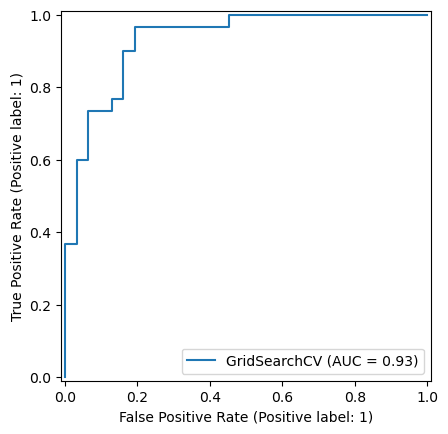

In [45]:
# Plot ROC CURVE
plt.close('all')
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()

In [46]:
#confusion matrix
print(confusion_matrix(y_test , y_preds))

[[25  6]
 [ 1 29]]


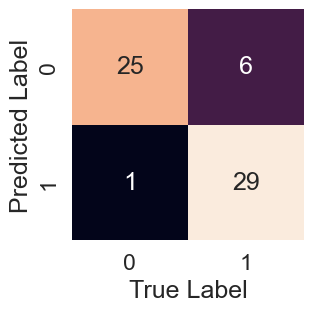

In [47]:
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test , y_preds):
    plt.close('all')
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),annot = True ,cbar =False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()
plot_conf_matrix(y_test , y_preds)

**Classification Report**

In [49]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.83      0.97      0.89        30

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.90      0.89      0.88        61



### Calculate  evaluation metrics using cross- validation
use `cross_val_score`

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
#Create a new classifier with the best parameters
clf = LogisticRegression(C= 0.20433597178569418 , 
                         solver ="liblinear")


In [59]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf , x , y ,cv =5,scoring ="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8446994535519124

In [61]:
# Cross Validated Precision
cv_precision =  cross_val_score(clf , x , y ,cv =5,scoring ="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [65]:
# Cross Validated Recall
cv_recall =  cross_val_score(clf , x , y ,cv =5,scoring ="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [64]:
# Cross Validated F1-Score
cv_f1_score =  cross_val_score(clf , x , y ,cv =5,scoring ="f1")
cv_f1_score = cv_f1_score.mean()
cv_f1_score

0.8673007976269721

In [68]:
#Visualize our cross - validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc , 
                           "Precision":cv_precision , 
                           "Recall":cv_recall , 
                           "F1-Score":cv_f1_score},index = [0] )
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.844699,0.820794,0.921212,0.867301


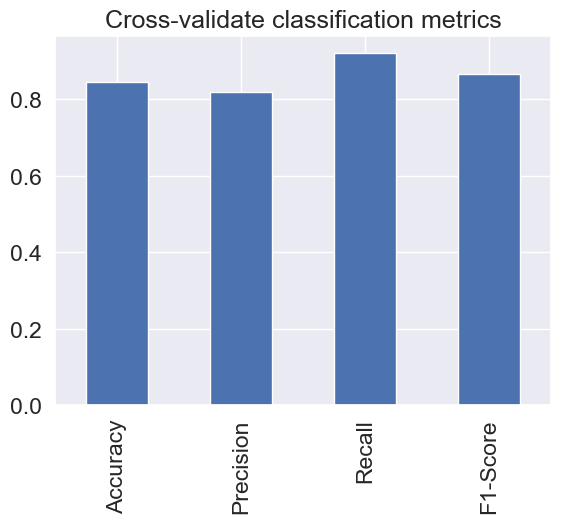

In [72]:
plt.close('all')
cv_metrics .T. plot. bar(title = "Cross-validate classification metrics" , legend = False)
plt.show()

### Feature Importance
feature importance is another way of asking which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning models. One way to find feature importance is is to search for `(MODEL NAME) feature importance` .

Let's find the feature importance for our Logistic Regression model .


In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
# fit an instance o f logisticregression
gs_log_reg.best_params_
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [79]:
clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [80]:
#check coef
clf.coef_

array([[ 3.96415056e-03, -8.51136191e-01,  7.32724637e-01,
        -1.72814732e-02, -4.41406923e-04,  2.09378553e-02,
         4.33190387e-01,  2.57572835e-02, -5.37778254e-01,
        -4.09914887e-01,  3.47239867e-01, -5.41380297e-01,
        -5.94524280e-01]])

In [81]:
#match coef's of features to columns
feature_dict = dict(zip (df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003964150556621875,
 'sex': -0.8511361911244961,
 'cp': 0.7327246367018362,
 'trestbps': -0.01728147322283689,
 'chol': -0.00044140692265626723,
 'fbs': 0.02093785534344298,
 'restecg': 0.4331903867619879,
 'thalach': 0.025757283512069743,
 'exang': -0.5377782535201651,
 'oldpeak': -0.40991488705454815,
 'slope': 0.347239866654891,
 'ca': -0.5413802965248781,
 'thal': -0.5945242799189696}

In [82]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict , index =[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003964,-0.851136,0.732725,-0.017281,-0.000441,0.020938,0.43319,0.025757,-0.537778,-0.409915,0.34724,-0.54138,-0.594524


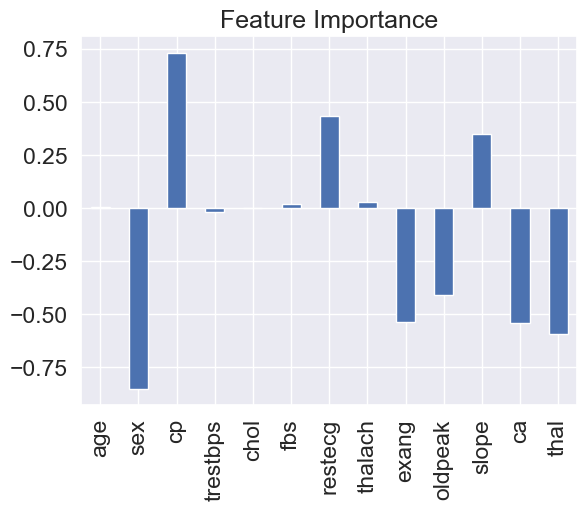

In [83]:
plt.close('all')
feature_df.T.plot.bar(title = "Feature Importance" , legend = False)
plt.show()

In [84]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93
